In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

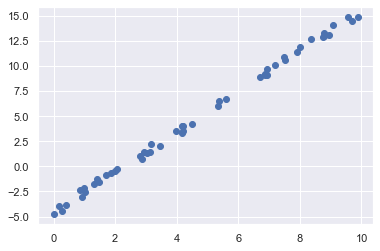

In [2]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x-5+rng.rand(50)
plt.scatter(x,y)

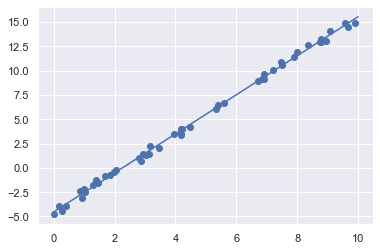

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:,np.newaxis],y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [4]:
print('model slope: ', model.coef_[0])
print('model intercept: ', model.intercept_)

model slope:  2.0082302432277497
model intercept:  -4.533652972099125


In [5]:
rng = np.random.RandomState(1)
x = 10*rng.rand(100, 3)
y = 0.5+np.dot(x, [1.5, -2, 1])
model.fit(x,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000138
[ 1.5 -2.   1. ]


In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(degree = 3, include_bias = False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())


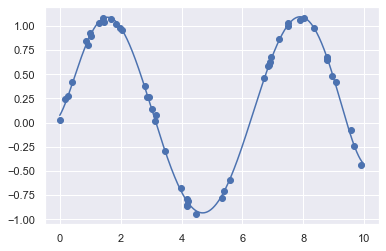

In [8]:
rng = np.random.RandomState(1)
x = 10 *rng.rand(50)
y = np.sin(x) + 0.1* rng.rand(50)

poly_model.fit(x[:,np.newaxis], y)
yfit = poly_model.predict(xfit[:,np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

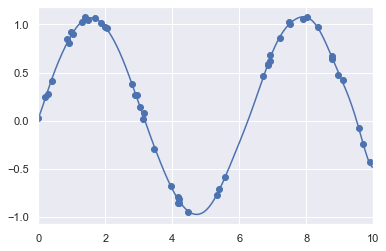

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
# """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x,y,width, axis = None):
        arg = (x-y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y =None):
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:,np.newaxis], y)
yfit=gauss_model.predict(xfit[:,np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

# Regularization

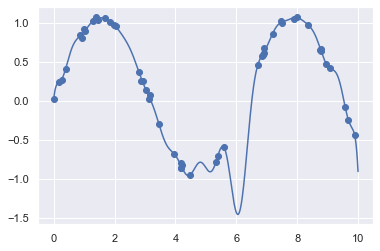

In [11]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:,np.newaxis], y)
plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:,np.newaxis]))


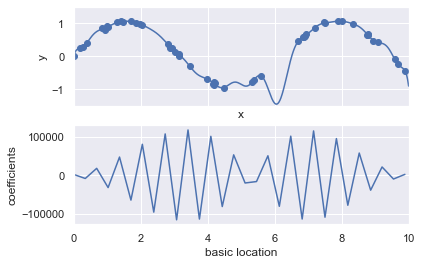

In [12]:
def basis_plot(model, title = None):
    fig, ax = plt.subplots(2, sharex = True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit, model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5,1.5))
    
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel = 'basic location', 
             ylabel = 'coefficients',
             xlim = (0,10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

## Ridge

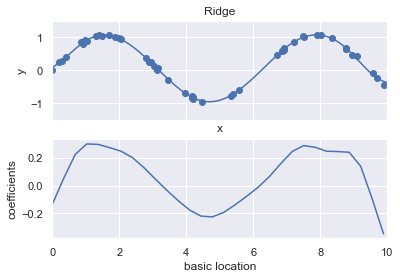

In [13]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title ='Ridge')

## Lasso 

D:\ANACONDA\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002392367543489593, tolerance: 0.0020951479019323737
  model = cd_fast.enet_coordinate_descent(


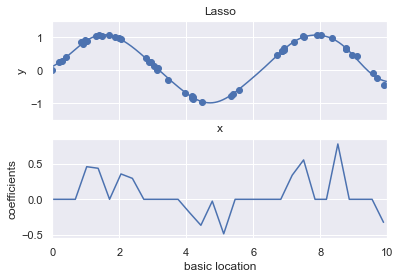

In [14]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.001))
basis_plot(model, title = 'Lasso')

# Example

In [15]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  399k    0  399k    0     0   399k      0 --:--:--  0:00:01 --:--:--  216k
100  415k    0  415k    0     0   207k      0 --:--:--  0:00:02 --:--:--  152k
100  927k    0  927k    0     0   309k      0 --:--:--  0:00:03 --:--:--  238k
100 1103k    0 1103k    0     0   275k      0 --:--:--  0:00:04 --:--:--  232k
100 1646k    0 1646k    0     0   329k      0 --:--:--  0:00:05 --:--:--  346k
100 1982k    0 1982k    0     0   330k      0 --:--:--  0:00:06 --:--:--  324k
100 2350k    0 2350k    0     0   335k      0 --:--:--  0:00:07 --:--:--  387k
100 2782k    0 2782k    0     0   347k      0 --:--:--  0:00:08 --:--:--  384k
100 3230k    0 3230k    0     0   358k      0 --:--

In [16]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col = 'Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates = True)

In [17]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [18]:
daily = counts.resample('d').sum() # resample the date index with day, and sum the data in a day unit
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [19]:
daily.head()

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0


In [20]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [21]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012','2016')
daily = daily.join(pd.Series(1, index = holidays, name = 'holiday')) #pd.Series make a series with 1 on holidays
daily['holiday'].fillna(0,inplace=True)

In [23]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
pd.Series(1, index = holidays, name = 'holiday')

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
2012-09-03    1
2012-10-08    1
2012-11-12    1
2012-11-22    1
2012-12-25    1
2013-01-01    1
2013-01-21    1
2013-02-18    1
2013-05-27    1
2013-07-04    1
2013-09-02    1
2013-10-14    1
2013-11-11    1
2013-11-28    1
2013-12-25    1
2014-01-01    1
2014-01-20    1
2014-02-17    1
2014-05-26    1
2014-07-04    1
2014-09-01    1
2014-10-13    1
2014-11-11    1
2014-11-27    1
2014-12-25    1
2015-01-01    1
2015-01-19    1
2015-02-16    1
2015-05-25    1
2015-07-03    1
2015-09-07    1
2015-10-12    1
2015-11-11    1
2015-11-26    1
2015-12-25    1
2016-01-01    1
Name: holiday, dtype: int64

<ipython-input-29-bf0ed2d45784>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date-pd.datetime(2000,12,21)).days


(8.0, 17.0)

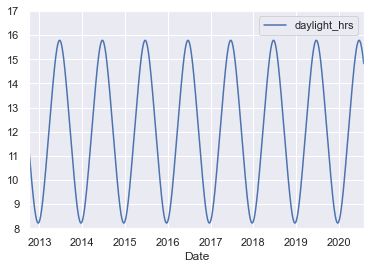

In [29]:
def hours_of_daylight(date, axis = 23.44, latitude = 47.61):
    """compute the hours of daylight of the given date"""
    days = (date-pd.datetime(2000,12,21)).days
    m = (1. - np.tan(np.radians(latitude))
         *np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [30]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [31]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [32]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [33]:
daily.shape

(2859, 14)

In [34]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)
daily.shape

(1064, 14)

In [35]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

In [37]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

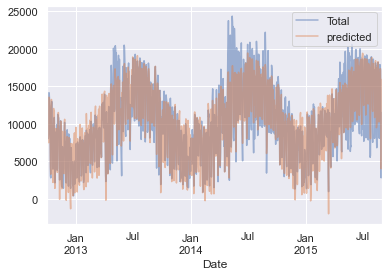

In [38]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [39]:
parame = pd.Series(model.coef_, index = X.columns)
parame

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

In [41]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_ for i in range(1000)], 0)

In [43]:
print(pd.DataFrame({'effect':parame.round(0),
                   'error': err.round(0)}))

              effect  error
Mon           2020.0  345.0
Tue           2441.0  333.0
Wed           2371.0  331.0
Thu           1929.0  341.0
Fri            712.0  324.0
Sat          -4413.0  318.0
Sun          -4534.0  332.0
holiday      -4750.0  653.0
daylight_hrs   515.0   36.0
PRCP         -2659.0  249.0
dry day       2191.0  133.0
Temp (C)       261.0   14.0
annual         108.0   71.0


# np.array for GaussianFeatures

In [ ]:
a = np.array([1,2,3])

In [ ]:
A = a[:,np.newaxis]
A
A.shape

In [ ]:
B=A-np.array([1,2])
B.shape


In [ ]:
B

In [ ]:
C=A[:,:,np.newaxis]-np.linspace(1,3,3)
C

In [ ]:
C.shape

In [ ]:
np.sum(C,axis=0)

In [ ]:
np.sum(C,axis=1)

In [ ]:
np.sum(C,axis=2)

In [ ]:
np.sum(C,axis =1).shape

In [ ]:
np.sum(C,axis =1)[0,2]

In [ ]:
np.sum(C,axis =1) # change back to 2D matrix